# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data 


Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [219]:
import numpy as np
import pandas as pd
import re
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
import warnings

In [220]:
warnings.filterwarnings('ignore')

In [221]:
df = pd.read_csv('train.csv')

In [222]:
df.head(20)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [223]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [224]:
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [225]:
train.fillna('', inplace=True)
test.fillna('', inplace=True)

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?


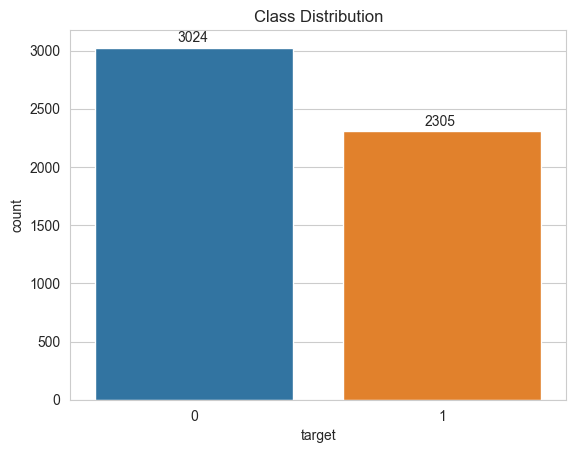

In [226]:
ax = sns.countplot(x=train.target)
ax.set_title('Class Distribution')
sns.set_style('whitegrid')

for i in ax.patches:
    ax.annotate('%1.0f' %(i.get_height()), (i.get_x()+0.33, i.get_height()+50))

2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [227]:
train_filtered = train[train.keyword != '']
popular_keywords = train_filtered.keyword.value_counts()[:10].index.tolist()
top_keywords = train_filtered[train_filtered.keyword.isin(popular_keywords)]
keyw_class = top_keywords.groupby(['keyword']).mean().sort_values(by=['target'])
keyw_class

,id,target
keyword,,
twister,10033.333333,0.100000
siren,8766.628571,0.114286
harm,5907.200000,0.133333
deluge,3177.774194,0.161290
fatality,5236.100000,0.266667
emergency,4524.533333,0.366667
nuclear%20reactor,7320.666667,0.400000
damage,2875.333333,0.472222
fatalities,5188.303030,0.484848


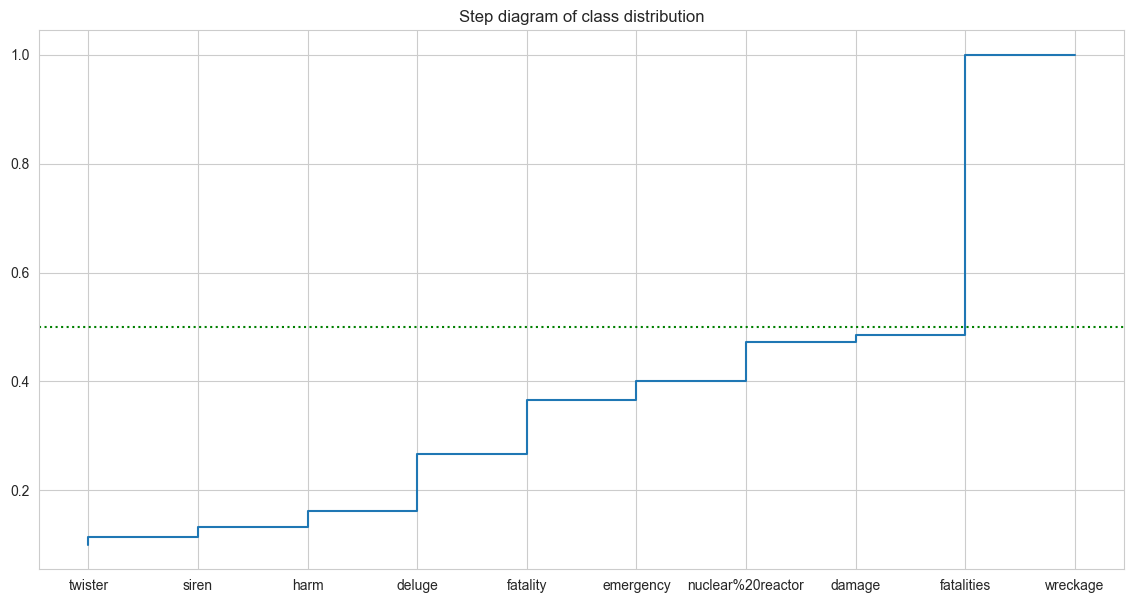

In [228]:
plt.figure(figsize=(14, 7))
plt.step(keyw_class.index, keyw_class.target)
plt.axhline(y=0.5, linestyle=':', color='green')
plt.title('Step diagram of class distribution')
plt.show()

**Выводы**: Положительный класс превалирует только у wreckage, остальные значения keyword чаще имеют 0-класс (твиты свидетельствуют о НЕнастоящей катастрофе).

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [229]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


In [230]:
data_cols = ['keyword', 'location', 'text']

train[data_cols] = train[data_cols].astype('str')
test[data_cols] = test[data_cols].astype('str')

train['data'] = train[data_cols].T.agg('; '.join)
test['data'] = test[data_cols].T.agg('; '.join)

data_cols += ['id']
train.drop(data_cols, inplace=True, axis=1)
test.drop(data_cols, inplace=True, axis=1)

train

,target,data
1186,0,bridge%20collapse; ; Ashes 2015: AustraliaÛªs...
4071,1,"hail; Carol Stream, Illinois; GREAT MICHIGAN T..."
5461,1,police; Houston ; CNN: Tennessee movie theater...
5787,1,rioting; ; Still rioting in a couple of hours ...
7445,0,wounds; Lake Highlands; Crack in the path wher...
...,...,...
5226,0,obliteration; Merica!; @Eganator2000 There are...
5390,0,panic; ; just had a panic attack bc I don't ha...
860,0,blood; ; Omron HEM-712C Automatic Blood Pressu...
7603,1,; ; Officials say a quarantine is in place at ...


In [231]:
train.loc[[6590, 7122, 2769]]

,target,data
6590,1,"survivors; Marietta, GA; Stemming from my #Cub..."
7122,1,violent%20storm; ; If you were the NWS wth a r...
2769,0,devastation; Atlanta g.a.; http://t.co/Gxgm1T3...


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [232]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer()
X = count_vec.fit_transform(train.data)
X

<5329x18455 sparse matrix of type '<class 'numpy.int64'>'
	with 86671 stored elements in Compressed Sparse Row format>

In [233]:
print(*count_vec.get_feature_names_out(), sep='; ')

00; 000; 0000; 00cy9vxeff; 00end; 00pm; 01; 011072; 014213; 02; 022017; 02elqlopfk; 02pm; 03; 030; 033; 034; 039; 03l7nwqdje; 04; 047821; 05; 05th; 06; 060; 06jst; 07; 072013; 073izwx0lb; 08; 0802; 0853; 087809233445; 0880; 09; 0ajisa5531; 0blkwcupzq; 0btniwagt1; 0bvk5tub4j; 0c1y8g7e9p; 0dqjeretxu; 0drqlrsgy5; 0dxvz7fdh3; 0f8xa4ih1u; 0fekgyby5f; 0fs9ksv5xk; 0ghk693egj; 0gknpy4lua; 0h7oua1pns; 0iw6drf5x9; 0iyuntxduv; 0jmkdtcymj; 0keh2treny; 0l; 0la1aw9uud; 0lmheaex9k; 0m1tw3datd; 0mnpcer9no; 0npzp; 0pamznyyuw; 0r03c6njli; 0rokdutyun; 0rsverlztm; 0s6ydfrwdq; 0scnwe8xbv; 0szwlwl9qu; 0t8vqkeari; 0t9yd557ry; 0tslqjokvh; 0uk0h9hozn; 0usdi5jcho; 0vcsafx9by; 0w12pwpsfx; 0wbecdmhqo; 0wdazlcm90; 0wratka2jl; 0x8jaqtowm; 0xa6fcjyec; 0xh758onup; 0xouv7dhwz; 0yaxrjicrr; 0yl3yt4ylh; 0ymf6txfch; 0yo2l38ozr; 0yxbb5dzw5; 0yzgw9zbhr; 0zznbvfuvo; 10; 100; 1000; 10000; 100000; 1008pla; 100bn; 100mb; 100nd; 100s; 101; 1017; 1023; 1028; 103; 104393; 10566; 106; 1061thetwister; 107; 109; 10am; 10k; 10km; 10m;

In [234]:
X.shape # matrix size

(5329, 18455)

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [235]:
def contains_digit(s: str) -> bool:
    # Проверка, содержит ли слово цифры
    return bool(re.search(r'\d', s))

def contains_punctuation(s: str) -> bool:
    # Проверка, содержит ли слово пунктуацию
    return bool(re.search(r'[^\w\s]+', s))

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    return bool(re.match(r'#\w+', s))

def is_mention(s: str) -> bool:
    # Проверка, является ли слово упоминанием
    return bool(re.match(r'@\w+', s))

def investigate_vocabulary(vocabulary):
    n_digits, n_punct, n_hashtags, n_mentions = (0 for _ in range(4))
    #words_digits, words_punct, words_hashtags, words_mentions = ([] for _ in range(4))
    for word in vocabulary:
        n_digits += contains_digit(word)
        n_punct += contains_punctuation(word)
        n_hashtags += is_hashtag(word)
        n_mentions += is_mention(word)
    
    print(f'With digit: {n_digits}')
    print(f'With punctuation: {n_punct}')
    print(f'Hashtags: {n_hashtags}')
    print(f'Mentions: {n_mentions}')

In [236]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit: 2
With punctuation: 7
Hashtags: 1
Mentions: 3


In [237]:
investigate_vocabulary(count_vec.vocabulary_)

With digit: 3812
With punctuation: 0
Hashtags: 0
Mentions: 0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [238]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

In [239]:
help(TweetTokenizer)

Help on class TweetTokenizer in module nltk.tokenize.casual:

class TweetTokenizer(nltk.tokenize.api.TokenizerI)
 |  TweetTokenizer(preserve_case=True, reduce_len=False, strip_handles=False, match_phone_numbers=True)
 |  
 |  Tokenizer for tweets.
 |  
 |      >>> from nltk.tokenize import TweetTokenizer
 |      >>> tknzr = TweetTokenizer()
 |      >>> s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
 |      >>> tknzr.tokenize(s0) # doctest: +NORMALIZE_WHITESPACE
 |      ['This', 'is', 'a', 'cooool', '#dummysmiley', ':', ':-)', ':-P', '<3', 'and', 'some', 'arrows', '<', '>', '->',
 |       '<--']
 |  
 |  Examples using `strip_handles` and `reduce_len parameters`:
 |  
 |      >>> tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
 |      >>> s1 = '@remy: This is waaaaayyyy too much for you!!!!!!'
 |      >>> tknzr.tokenize(s1)
 |      [':', 'This', 'is', 'waaayyy', 'too', 'much', 'for', 'you', '!', '!', '!']
 |  
 |  Method resolution order:
 |     

In [240]:
cnt_vec_tok = CountVectorizer(tokenizer=TweetTokenizer().tokenize)
X = cnt_vec_tok.fit_transform(train.data)
X.shape

(5329, 19676)

In [241]:
investigate_vocabulary(cnt_vec_tok.vocabulary_)

With digit: 3939
With punctuation: 7318
Hashtags: 1468
Mentions: 1678


**Сравнение:** Было найдено чуть больше чисел и значительно больше пунктуации, хэштегов, упоминаний

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer



In [242]:
import nltk
from nltk.stem.snowball import SnowballStemmer

In [243]:
def contains_only_latin_letters(s: str) -> bool:
    # Проверка, содержит ли слово только латинские буквы
    latin_letters = re.search(r'[A-z]+', s)
    if latin_letters:
        return s == latin_letters[0]
    return False

def is_emoji(s: str) -> bool:
    # Проверка, является ли слово смайликом
    punct = re.search(r'[^\w\s]+', s)
    if punct and s == punct[0]:
        return bool(re.match(r'[(\[{<>}\])]', punct[0][-1])) \
               or bool(re.match(r'[(\[{<>}\])]', punct[0][0]))
    return False

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    hashtag = re.match(r'#[A-z]+', s)
    if hashtag and s == hashtag[0]:
        return s == hashtag[0]
    return False

def custom_tokenizer(s: str) -> List[str]:
    # Кастомный токенайзер
    tokenized = []
    toker = TweetTokenizer()
    stemmer = SnowballStemmer('english')
    tokens = toker.tokenize(s.lower())
    
    for tok in tokens:
        
        if (contains_only_latin_letters(tok)
        or is_emoji(tok) or is_hashtag(tok)) \
        and tok not in nltk.corpus.stopwords.words('english'):
            
            tokenized.append(stemmer.stem(tok))
        
    return tokenized

In [244]:
custom_tokenizer('She LOVES painting :-) #art')

['love', 'paint', ':-)', '#art']

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [245]:
for i in train.iloc[:10]['data']:
    print(f'Original string:\n\t {i}')
    print(f'Tokenized:\n\t {custom_tokenizer(i)}\n')
    print('_' * 69)

Original string:
	 bridge%20collapse; ; Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0
Tokenized:
	 ['bridg', 'ash', 'australia', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia']

_____________________________________________________________________
Original string:
	 hail; Carol Stream, Illinois; GREAT MICHIGAN TECHNIQUE CAMP
B1G THANKS TO @bmurph1019 
@hail_Youtsey . @termn8r13 
#GoBlue #WrestleOn http://t.co/OasKgki6Qj
Tokenized:
	 ['hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'thank', '#goblu', '#wrestleon']

_____________________________________________________________________
Original string:
	 police; Houston ; CNN: Tennessee movie theater shooting suspect killed by police http://t.co/dI8ElZsWNR
Tokenized:
	 ['polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic']

__________

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.


In [246]:
y_train = train.target
y_test = test.target

In [247]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer)

X_train = vectorizer.fit_transform(train.data)
X_test = vectorizer.transform(test.data)

vectorizer.vocabulary_

{'bridg': 2337,
 'ash': 1771,
 'australia': 1848,
 'collaps': 2920,
 'trent': 9676,
 'among': 1605,
 'worst': 10364,
 'histori': 5058,
 'england': 3909,
 'bundl': 2432,
 'hail': 4854,
 'carol': 2588,
 'stream': 9106,
 'illinoi': 5280,
 'great': 4737,
 'michigan': 6466,
 'techniqu': 9368,
 'camp': 2525,
 'thank': 9443,
 '#goblu': 451,
 '#wrestleon': 1299,
 'polic': 7549,
 'houston': 5158,
 'cnn': 2881,
 'tennesse': 9399,
 'movi': 6678,
 'theater': 9447,
 'shoot': 8635,
 'suspect': 9237,
 'kill': 5748,
 'riot': 8163,
 'still': 9069,
 'coupl': 3110,
 'hour': 5154,
 'left': 5947,
 'class': 2832,
 'wound': 10368,
 'lake': 5856,
 'highland': 5028,
 'crack': 3128,
 'path': 7309,
 'wipe': 10291,
 'morn': 6644,
 'beach': 2025,
 'run': 8291,
 'surfac': 9221,
 'elbow': 3825,
 'right': 8152,
 'knee': 5782,
 'airplan': 1505,
 'somewher': 8872,
 'expert': 4059,
 'franc': 4408,
 'begin': 2055,
 'examin': 4032,
 'debri': 3326,
 'found': 4388,
 'reunion': 8104,
 'island': 5482,
 'french': 4434,
 'air':

2. Обучите LogisticRegression на полученных признаках.


In [248]:
from sklearn.linear_model import LogisticRegression

cls_model = LogisticRegression()
cls_model.fit(X_train, y_train)

prediction = cls_model.predict(X_test)

3. Посчитайте метрику f1-score на тестовых данных.

In [249]:
from sklearn.metrics import f1_score

print(f'F1 Score: {f1_score(y_test, prediction)}')

F1 Score: 0.7509413663259816


## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?


In [250]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(tokenizer=custom_tokenizer) # default:  max_df=1

X_train = tfidf_vec.fit_transform(train.data)
X_test = tfidf_vec.transform(test.data)

cls_model = LogisticRegression()
cls_model.fit(X_train, y_train)
prediction = cls_model.predict(X_test)

print(f'F1 Score: {f1_score(y_test, prediction)}')

F1 Score: 0.7405345211581291


1. **Ответ:** До этого качество было немного лучше. Сейчас попробуем выкрутить max_df, возможно это исправит ситуацию.

2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [251]:
max_tfidf = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9)

X_train = max_tfidf.fit_transform(train.data)
X_test = max_tfidf.transform(test.data)

cls_model = LogisticRegression()
cls_model.fit(X_train, y_train)
prediction = cls_model.predict(X_test)

print(f'F1 Score: {f1_score(y_test, prediction)}')

F1 Score: 0.7405345211581291


2. **Ответ:** Странно, абсолютно та же самая величина

3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [252]:
cut_tfidf = TfidfVectorizer(tokenizer=custom_tokenizer, 
                            min_df=0.05, max_df=0.9)

X_train = cut_tfidf.fit_transform(train.data)
X_test = cut_tfidf.transform(test.data)

cls_model = LogisticRegression()
cls_model.fit(X_train, y_train)
prediction = cls_model.predict(X_test)

print(f'F1 Score: {f1_score(y_test, prediction)}')

F1 Score: 0.0


3. **Ответ:** АХАХАХХАХАХАХХАХАХАХАХАХХАХАХАХАХАХХХАХАХАХАХ. Кхм. А если уменьшить min_df до 0.01, то качество немного возрастёт, но всё равно не будет лучшим? Да (проверил). Тогда уменьшим ещё сильнее.

In [253]:
cut_tfidf = TfidfVectorizer(tokenizer=custom_tokenizer, 
                            min_df=0.000000000000001, max_df=0.9)

X_train = cut_tfidf.fit_transform(train.data)
X_test = cut_tfidf.transform(test.data)

cls_model = LogisticRegression()
cls_model.fit(X_train, y_train)
prediction = cls_model.predict(X_test)

print(f'F1 Score: {f1_score(y_test, prediction)}')

F1 Score: 0.7405345211581291


In [254]:
default_min_tfidf = TfidfVectorizer(tokenizer=custom_tokenizer, 
                            min_df=1, max_df=0.9)

X_train = default_min_tfidf.fit_transform(train.data)
X_test = default_min_tfidf.transform(test.data)

cls_model = LogisticRegression()
cls_model.fit(X_train, y_train)
prediction = cls_model.predict(X_test)

print(f'F1 Score: {f1_score(y_test, prediction)}')

F1 Score: 0.7405345211581291


Покрутив min_df заметил закономерность: чем меньше данная величина, тем больше приближаемся к тому качеству, когда минимальное ограничение было дефолтным.

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.


In [255]:
from sklearn.feature_extraction.text import HashingVectorizer

hash_vec = HashingVectorizer(tokenizer=custom_tokenizer, n_features=5000)

X_train = hash_vec.fit_transform(train.data)
X_test = hash_vec.transform(test.data)

cls_model = LogisticRegression()
cls_model.fit(X_train, y_train)
prediction = cls_model.predict(X_test)

print(f'F1 Score: {f1_score(y_test, prediction)}')

F1 Score: 0.720489977728285


2. Какой из подходов показал самый высокий результат?

2. **Ответ:** Cамой лучшей моделью оказалась реализация с CountVectorizer в основе. Последняя модель с HashingVectorizer показала результат лучше, чем почти все эксперименты с TfidfVectorizer, но она явно не дотягивала до F1 с CountVectorizer.

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя бы в 0.75 на тестовых данных.

Попробую предварительно отскалировать данные

In [256]:
from sklearn.preprocessing import MaxAbsScaler

vec_2 = CountVectorizer(tokenizer=custom_tokenizer)
X_train = vec_2.fit_transform(train.data)
X_test = vec_2.transform(test.data)

scal = MaxAbsScaler()
X_train = scal.fit_transform(X_train)
X_test = scal.transform(X_test)

cls_model = LogisticRegression()
cls_model.fit(X_train, y_train)
prediction = cls_model.predict(X_test)

print(f'F1 Score: {f1_score(y_test, prediction)}')

F1 Score: 0.7429205996668518


Что будет, если поиграть с n-граммами как в семинарском ноутбуке

In [257]:
vec_3 = CountVectorizer(tokenizer=custom_tokenizer, 
                        min_df=5 * 1e-4,
                        ngram_range=(1, 3))

X_train = vec_3.fit_transform(train.data)
X_test = vec_3.transform(test.data)

cls_model = LogisticRegression(max_iter=200)
cls_model.fit(X_train, y_train)
prediction = cls_model.predict(X_test)

print(f'F1 Score: {f1_score(y_test, prediction)}')

F1 Score: 0.7435622317596566


А если без них?

In [260]:
vec_4 = CountVectorizer(tokenizer=custom_tokenizer, 
                        min_df=5 * 1e-4)

X_train = vec_4.fit_transform(train.data)
X_test = vec_4.transform(test.data)

cls_model = LogisticRegression()
cls_model.fit(X_train, y_train)
prediction = cls_model.predict(X_test)

print(f'F1 Score: {f1_score(y_test, prediction)}')

F1 Score: 0.7546766435061466


DONE.